In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# polynomial basis function
def x_transform(x, degrees):
    # x --> input
    # degrees --> value of M till we want to transform the input

    # reshaping X to a column vector
    x = x.reshape(-1, 1)

    # the first column should have all ones
    x_new = np.ones((x.shape[0], 1))

    # making a copy of X
    t = x.copy()

    # Appending columns of higher degrees to X
    for i in range(1, degrees):
        x_new = np.append(x_new, t**i, axis=1)
            
    return x_new

In [5]:
# computing mean and variance of posterior distribution/p(w|t,alpha,beta)
def posterior(phi, t, alpha, beta):
    # phi --> tranformed input data (polynomial basis)
    # t --> target data
    # alpha --> precision of prior distribution
    # beta --> precision of noise

    degree = phi.shape[1]

    # computing variance of posterior distribution, inverse of (alpha*I + beta*phi.T*phi)
    S_n_inverse = np.linalg.inv(alpha * np.identity(degree) + beta * phi.T.dot(phi))
    # computing mean of posterior distribution, beta*S_n_inverse*phi.T*t
    mu_n = beta * S_n_inverse.dot(phi.T).dot(t)

    return mu_n, S_n_inverse

In [6]:
# computing mean and variance of predictive distribution/p(t|t,alpha,beta)
def posterior_predictive(phi, mu_n, S_n_inverse, beta):
    # phi --> transformed input data (polynomial basis)
    # mu_n --> mean of posterior distribution
    # S_n_inverse --> variance of posterior distribution
    # beta --> precision of noise

    # computing mean of predictive distribution, phi_test.T*m_N
    mu_post_pred = phi.dot(mu_n)

    # Only compute variances (diagonal elements of covariance matrix), 1/beta + phi_test.T*S_N*phi_test
    var_n = 1 / beta + np.sum(phi.dot(S_n_inverse) * phi, axis=1)
    
    return mu_post_pred, var_n

In [7]:
beta = 1 # precision of noise
alpha = 0.005 # precision of prior distribution

In [8]:
M = [9] # degree value
N = [7, 9, 15, 25] # number of points in train dataset

Degree: 9 Number of Points: 7


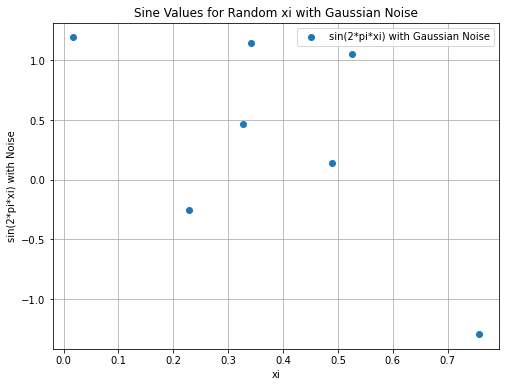

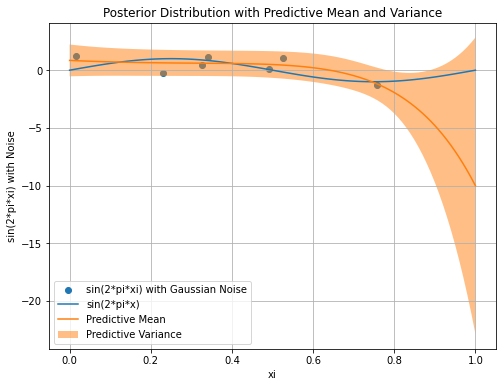

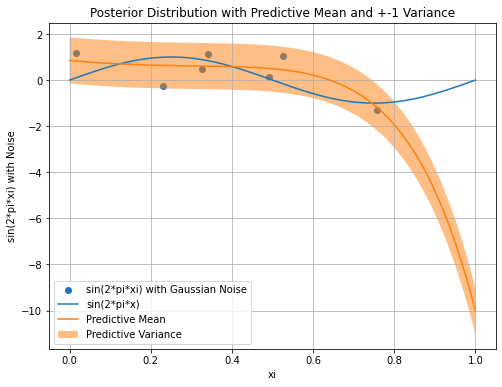

--------------------------------------------------------------------
Degree: 9 Number of Points: 9


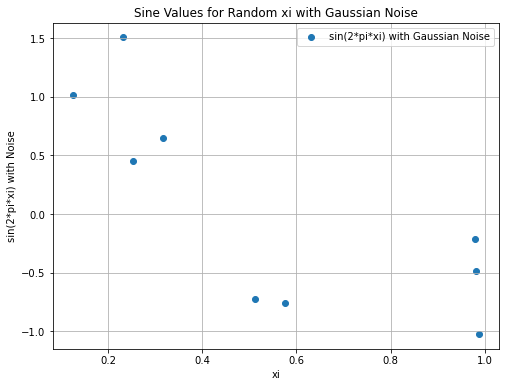

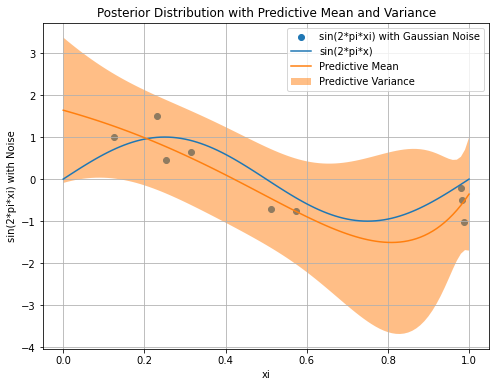

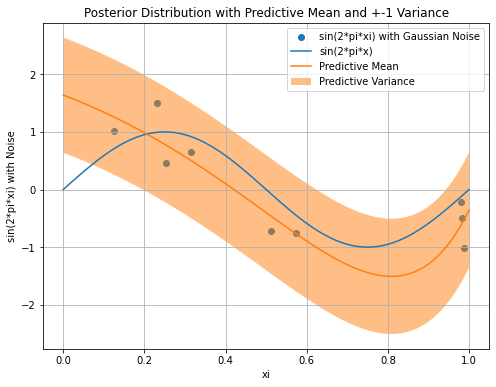

--------------------------------------------------------------------
Degree: 9 Number of Points: 15


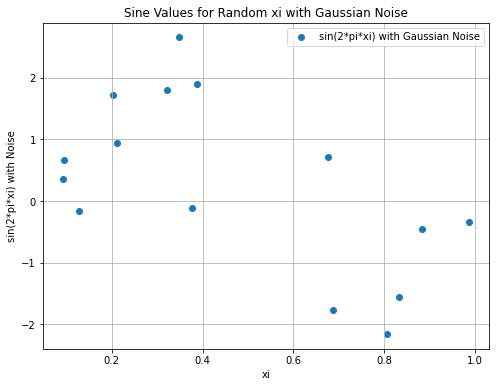

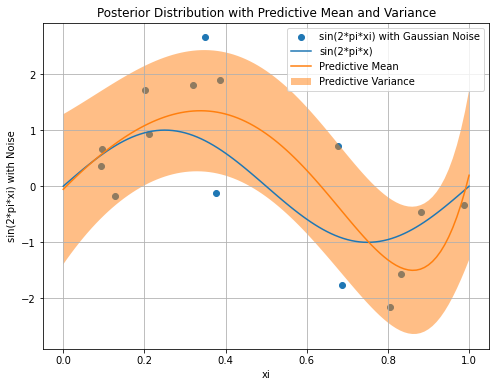

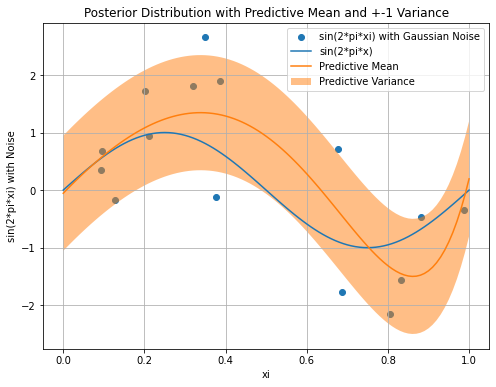

--------------------------------------------------------------------
Degree: 9 Number of Points: 25


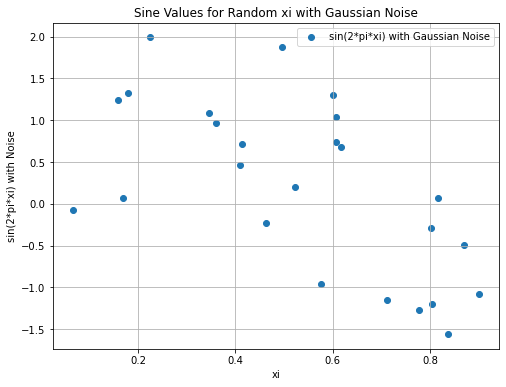

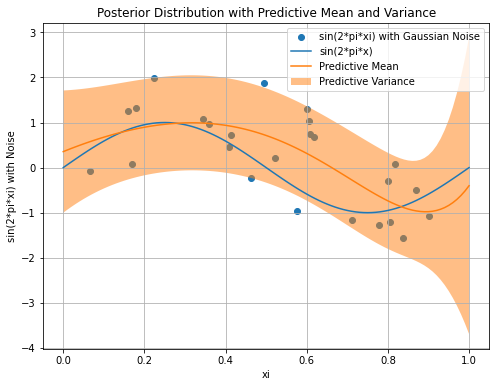

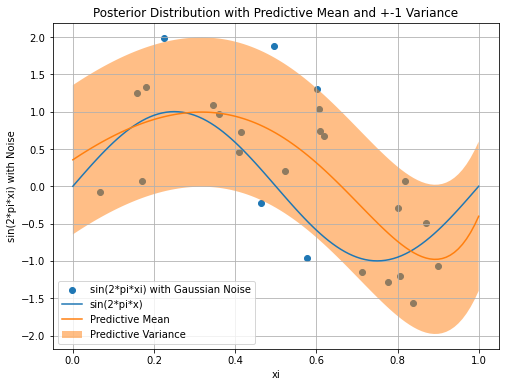

--------------------------------------------------------------------


In [12]:
for degree in M:
    for num_points in N:
        # generating random num_points between 0 to 1
        random_x_values = np.random.rand(num_points)

        # Calculate sin(2*pi*xi) for each xi
        sine_values = np.sin(2 * np.pi * random_x_values)

        # Add Gaussian noise with mean 0 and variance ±1
        noise = np.random.normal(0, 1/beta, num_points)

        # Add the Gaussian noise to the sine values
        sine_values_with_noise = sine_values + noise

        # Plot the sine values with noise
        print('Degree:', degree, 'Number of Points:', num_points)
        plt.figure(figsize=(8, 6))
        plt.scatter(random_x_values, sine_values_with_noise, label='sin(2*pi*xi) with Gaussian Noise')
        plt.xlabel('xi')
        plt.ylabel('sin(2*pi*xi) with Noise')
        plt.legend()
        plt.title('Sine Values for Random xi with Gaussian Noise')
        plt.grid(True)
        plt.show()

        # transforming x to polynomial basis, i.e. summation wi * (x ** i) till M/degree
        phi = x_transform(random_x_values, degree)

        # computing mean and variance of posterior distribution/p(w|t,alpha,beta)
        mu_n, S_n_inverse = posterior(phi, sine_values_with_noise, alpha, beta)

        # testing the model on 101 points between 0 to 1
        x_test = np.linspace(0, 1, 101).reshape(-1, 1)
        # transforming x_test to polynomial basis, i.e. summation wi * (x ** i) till M/degree
        phi_test = x_transform(x_test, 9)

        # computing mean and variance of predictive distribution/p(t|t,alpha,beta)
        mu_post_pred, var_n = posterior_predictive(phi_test, mu_n, S_n_inverse, beta)

        # plotting the posterior distribution/p(w|t,alpha,beta) with |sigma| region and predictive mean
        plt.figure(figsize=(8, 6))
        # plotting the sine values with noise
        plt.scatter(random_x_values, sine_values_with_noise, label='sin(2*pi*xi) with Gaussian Noise')
        # plotting truth (the actual sine curve)
        plt.plot(x_test, np.sin(2 * np.pi * x_test), label='sin(2*pi*x)')
        # plotting predictive mean
        plt.plot(x_test, mu_post_pred, label='Predictive Mean')
        # plotting predictive variance
        plt.fill_between(x_test.ravel(), mu_post_pred.ravel() - np.sqrt(var_n), mu_post_pred.ravel() + np.sqrt(var_n), alpha=0.5, label='Predictive Variance')
        plt.xlabel('xi')
        plt.ylabel('sin(2*pi*xi) with Noise')
        plt.legend()
        plt.title('Posterior Distribution with Predictive Mean and Variance')
        plt.grid(True)
        plt.show()

        # plotting the posterior distribution/p(w|t,alpha,beta) with |sigma| region and predictive mean
        plt.figure(figsize=(8, 6))
        # plotting the sine values with noise
        plt.scatter(random_x_values, sine_values_with_noise, label='sin(2*pi*xi) with Gaussian Noise')
        # plotting truth (the actual sine curve)
        plt.plot(x_test, np.sin(2 * np.pi * x_test), label='sin(2*pi*x)')
        # plotting predictive mean
        plt.plot(x_test, mu_post_pred, label='Predictive Mean')
        # plotting for |sigma| region = +- 1
        plt.fill_between(x_test.ravel(), mu_post_pred.ravel() - 1, mu_post_pred.ravel() + 1, alpha=0.5, label='Predictive Variance')
        plt.xlabel('xi')
        plt.ylabel('sin(2*pi*xi) with Noise')
        plt.legend()
        plt.title('Posterior Distribution with Predictive Mean and +-1 Variance')
        plt.grid(True)
        plt.show()
        
        print('--------------------------------------------------------------------')